In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Читаем файл
df = pd.read_csv('UkraineConflict.csv')
df = df.sort_values(by=['TIMESTAMP'])
df.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
9775,UKR9360,14-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,West Coast of Kherson,45.986,31.970,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 14 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9718,UKR9273,13-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,Coast of Mykolaiv,46.415,31.196,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 13 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9654,UKR9227,12-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,East Coast of Kherson,45.997,35.327,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 12 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
9616,UKR9180,11-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),NaN,1,...,Coast of Zaporizhia,46.358,36.271,2,Liveuamap; 112 Ukrayina; Ukrainian Military Po...,Local partner-New media,"On 11 September 2018, in Odessa, Zaporizhia, K...",0,NaN,1571164407
10294,UKR9824,25-September-2018,2018,1,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Russia (2000-),NaN,8,...,Coast of Donetsk,46.691,37.282,2,Liveuamap; Ukrainian Military Portal,Local partner-New media,"On 25 September 2018, at Coast of Donetsk, Rus...",0,NaN,1571164407


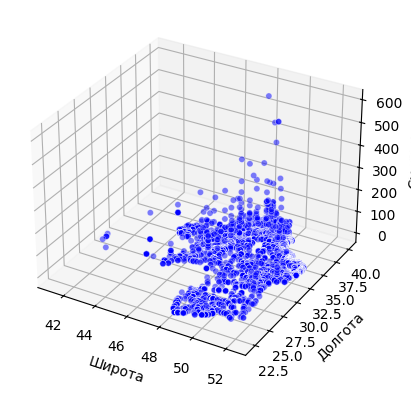

In [63]:

# Диаграмма рассеивания
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['LATITUDE']
y = df['LONGITUDE']
z = df['FATALITIES']
ax.scatter(x, y, z, color = "blue", edgecolors = "white", linewidths = 0.4, alpha = 0.5)
ax.set_xlabel('Широта')
ax.set_ylabel('Долгота')
ax.set_zlabel('Смерти')
plt.show()


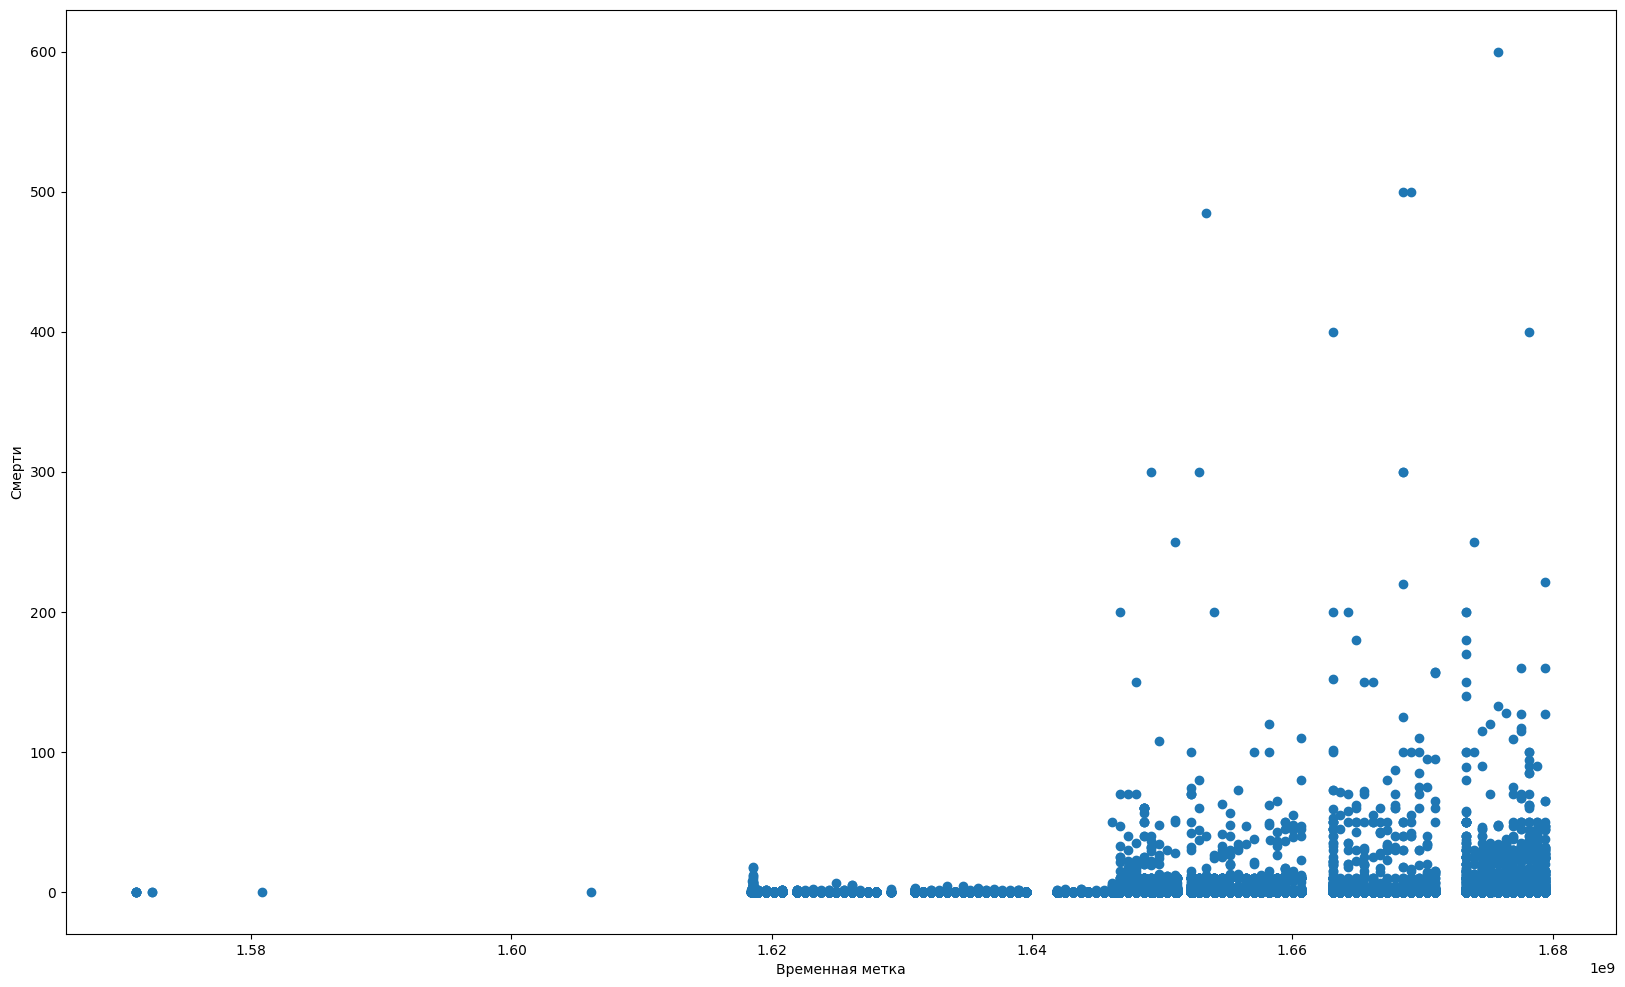

In [64]:

# Диаграмма рассеивания
flg, ax = plt.subplots(figsize=(20, 12))

ax.scatter(x=df['TIMESTAMP'], y=df['FATALITIES'])
plt.xlabel("Временная метка")
plt.ylabel("Смерти")
plt.show()


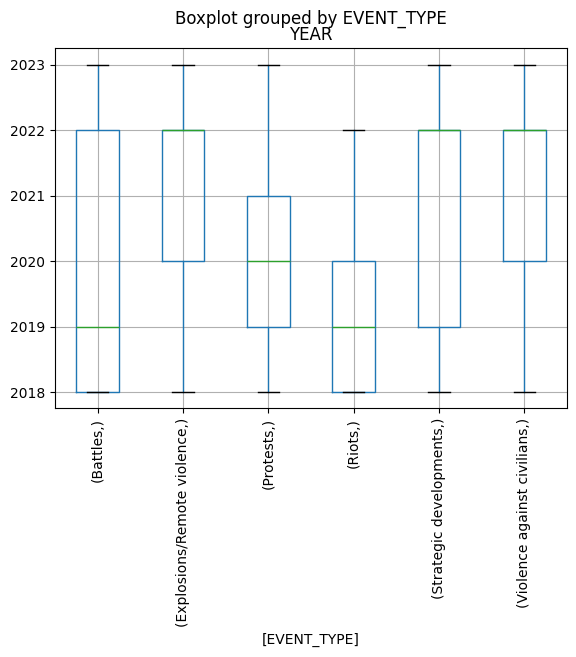

In [65]:

# Ящик с усами
df.boxplot(column=['YEAR'], by=['EVENT_TYPE'], rot=90)
plt.show()

<Axes: >

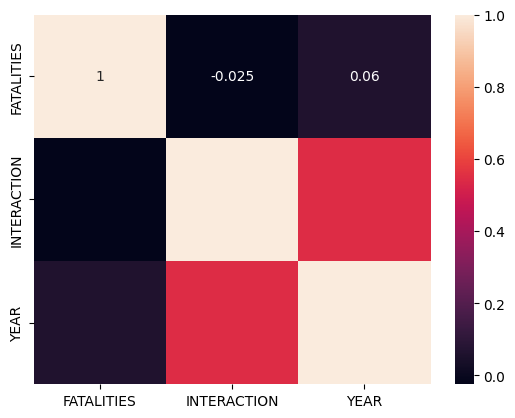

In [66]:
# кореляционная матрица
corr_df = df[['FATALITIES', 'INTERACTION', 'YEAR']]
corr = corr_df.corr()
sns.heatmap(corr, annot=True)


array([[<Axes: title={'center': 'YEAR'}>]], dtype=object)

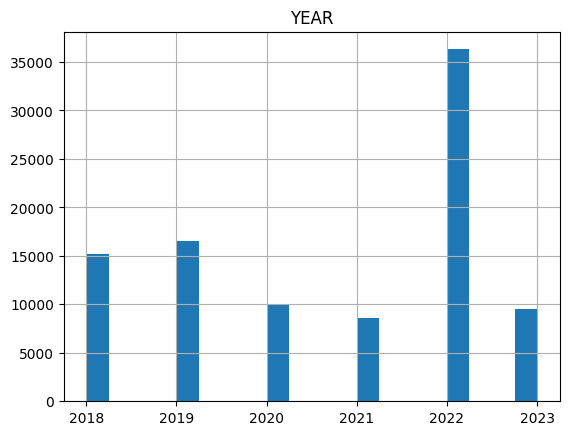

In [67]:
# гистограмма

df.hist(column='YEAR', bins=20)


<Axes: >

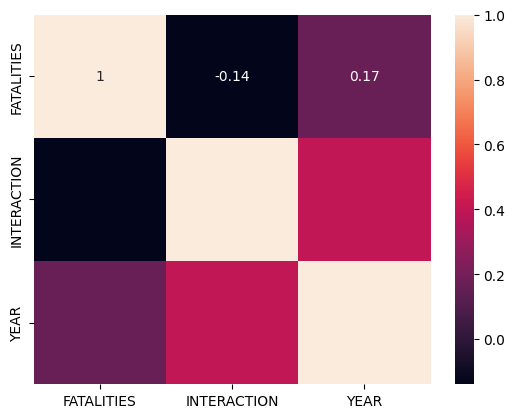

In [68]:
norm_df = df[df['FATALITIES']>0][['FATALITIES', 'INTERACTION', 'YEAR']]
norm_df['FATALITIES'] = (norm_df['FATALITIES']-norm_df['FATALITIES'].median())/norm_df['FATALITIES'].std()
norm_df['INTERACTION'] = (df['INTERACTION']-df['INTERACTION'].median())/df['INTERACTION'].std()
norm_df['YEAR'] = (df['YEAR']-df['YEAR'].median())/df['YEAR'].std()
corr_df = norm_df[['FATALITIES', 'INTERACTION', 'YEAR']]
corr = corr_df.corr()
sns.heatmap(corr, annot=True)
